In [40]:
!pip3 install ucimlrepo


In [41]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
credit_approval = fetch_ucirepo(id=27) 
  
# data (as pandas dataframes) 
X = credit_approval.data.features 
y = credit_approval.data.targets 

X.shape, y.shape

((690, 15), (690, 1))

In [42]:
import pandas as pd

Data = X
Data["Target"] = y

Data.head()

,A15,A14,A13,A12,A11,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1,Target
0,0,202.0,g,f,1,t,t,1.25,v,w,g,u,0.000,30.83,b,+
1,560,43.0,g,f,6,t,t,3.04,h,q,g,u,4.460,58.67,a,+
2,824,280.0,g,f,0,f,t,1.50,h,q,g,u,0.500,24.50,a,+
3,3,100.0,g,t,5,t,t,3.75,v,w,g,u,1.540,27.83,b,+
4,0,120.0,s,f,0,f,t,1.71,v,w,g,u,5.625,20.17,b,+


In [43]:
Data['Target'] =  Data['Target'].map({'+':1, '-':0})

Data.head()

,A15,A14,A13,A12,A11,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1,Target
0,0,202.0,g,f,1,t,t,1.25,v,w,g,u,0.000,30.83,b,1
1,560,43.0,g,f,6,t,t,3.04,h,q,g,u,4.460,58.67,a,1
2,824,280.0,g,f,0,f,t,1.50,h,q,g,u,0.500,24.50,a,1
3,3,100.0,g,t,5,t,t,3.75,v,w,g,u,1.540,27.83,b,1
4,0,120.0,s,f,0,f,t,1.71,v,w,g,u,5.625,20.17,b,1


In [44]:
Data.isna().sum()

A15        0
A14       13
A13        0
A12        0
A11        0
A10        0
A9         0
A8         0
A7         9
A6         9
A5         6
A4         6
A3         0
A2        12
A1        12
Target     0
dtype: int64

In [45]:
Data['Target'].value_counts()

Target
0    383
1    307
Name: count, dtype: int64

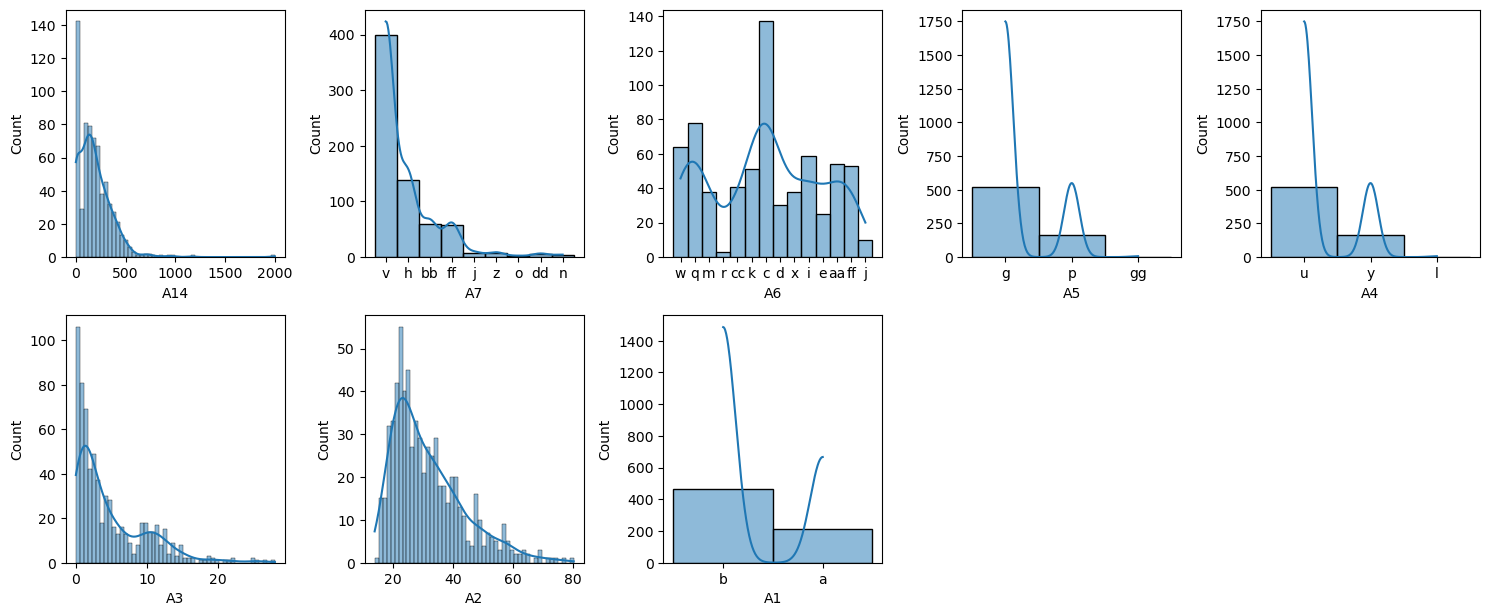

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['A14', 'A7', 'A6', 'A5','A4', 'A3', 'A2', 'A1']

plt.figure(figsize=(15,15))
count = 1
for col in columns:
    plt.subplot(5,5,count)
    sns.histplot(Data[col], bins=50, kde=True)
    count+=1

plt.tight_layout()
plt.show()



In [47]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A15     690 non-null    int64  
 1   A14     677 non-null    float64
 2   A13     690 non-null    object 
 3   A12     690 non-null    object 
 4   A11     690 non-null    int64  
 5   A10     690 non-null    object 
 6   A9      690 non-null    object 
 7   A8      690 non-null    float64
 8   A7      681 non-null    object 
 9   A6      681 non-null    object 
 10  A5      684 non-null    object 
 11  A4      684 non-null    object 
 12  A3      690 non-null    float64
 13  A2      678 non-null    float64
 14  A1      678 non-null    object 
 15  Target  690 non-null    int64  
dtypes: float64(4), int64(3), object(9)
memory usage: 86.4+ KB


In [48]:
for column in Data.columns:
    if(Data[column].dtype == 'object'):
        Data[column] = Data[column].fillna(Data[column].mode()[0])
    else:
        Data[column] = Data[column].fillna(Data[column].mean())


In [49]:
Data.isna().sum()

A15       0
A14       0
A13       0
A12       0
A11       0
A10       0
A9        0
A8        0
A7        0
A6        0
A5        0
A4        0
A3        0
A2        0
A1        0
Target    0
dtype: int64

In [50]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_columns = Data.select_dtypes(include=["object"]).columns

for column in categorical_columns:
    if Data[column].nunique == 2:
        Data[column] = label_encoder.fit_transform(Data[column].astype(str))
    else:   
        Data = pd.get_dummies(Data, columns=[column], drop_first=True)



In [51]:
Data = Data.apply(lambda x: x.astype(int) if x.dtype == 'float64' else x)
Data = Data.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)



In [52]:
Data.head()

,A15,A14,A11,A8,A3,A2,Target,A13_p,A13_s,A12_t,...,A6_m,A6_q,A6_r,A6_w,A6_x,A5_gg,A5_p,A4_u,A4_y,A1_b
0,0,202,1,1,0,30,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,560,43,6,3,4,58,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,824,280,0,1,0,24,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,3,100,5,3,1,27,1,0,0,1,...,0,0,0,1,0,0,0,1,0,1
4,0,120,0,1,5,20,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1


<Axes: >

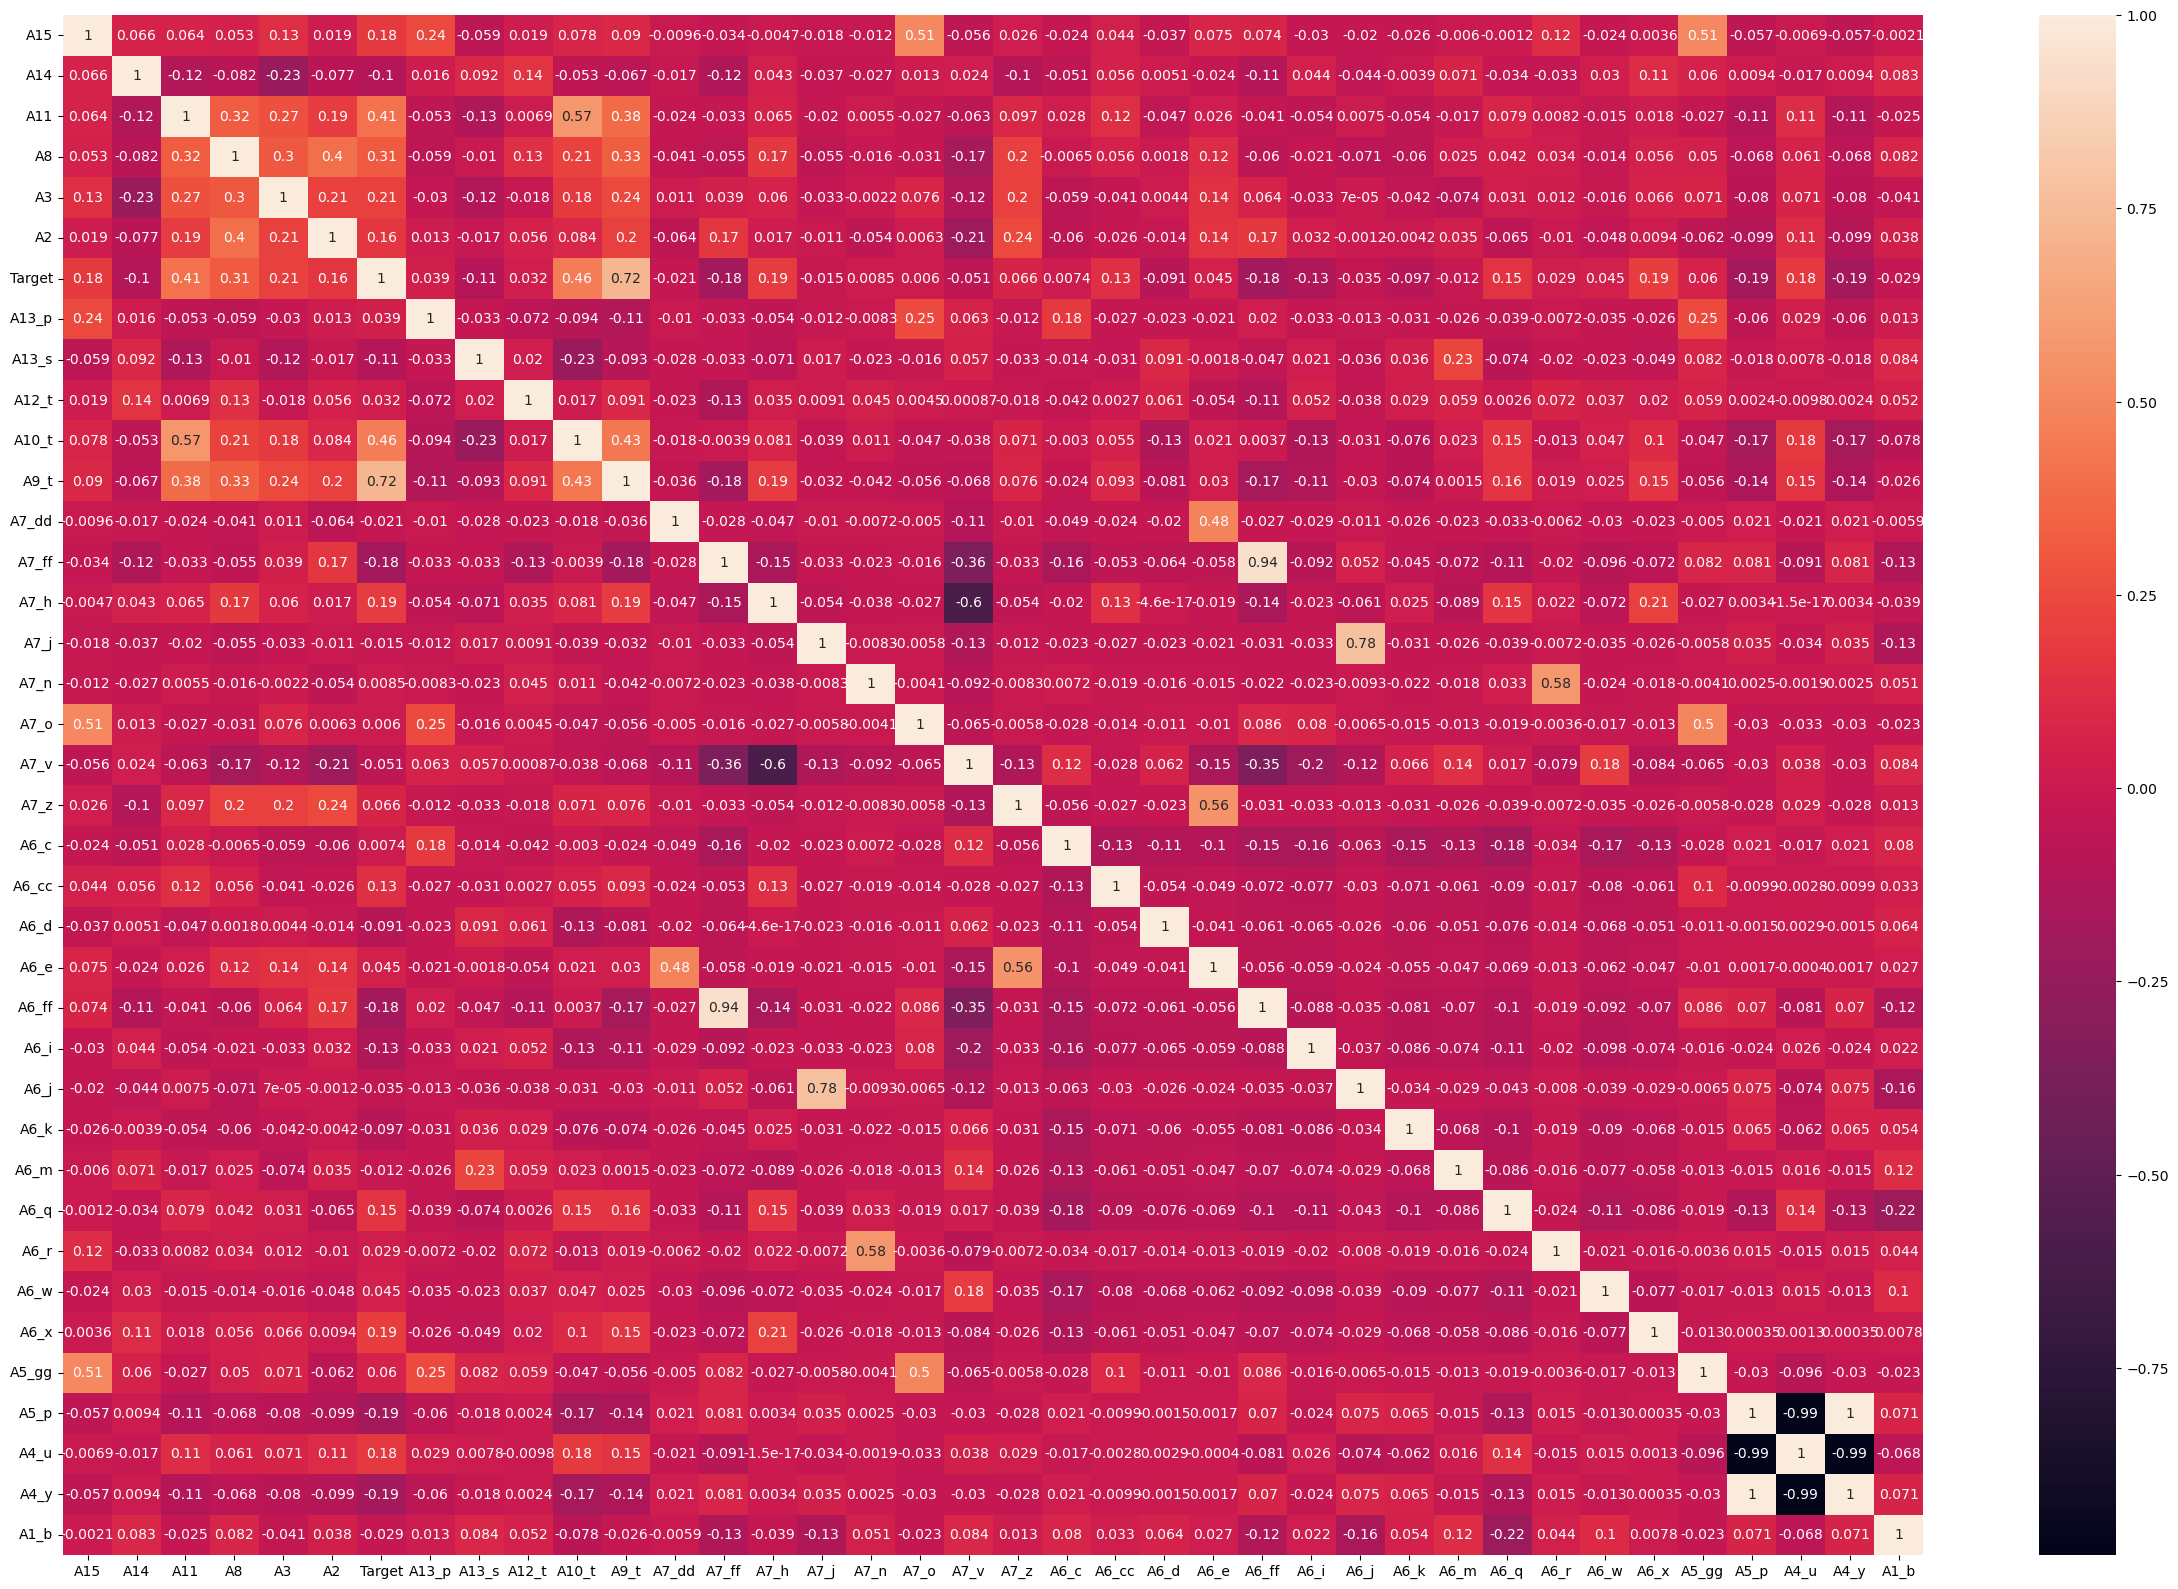

In [53]:

plt.figure(figsize=(30,20))
sns.heatmap(Data.corr(), annot=True)

In [54]:
Data.corr().columns

Index(['A15', 'A14', 'A11', 'A8', 'A3', 'A2', 'Target', 'A13_p', 'A13_s',
       'A12_t', 'A10_t', 'A9_t', 'A7_dd', 'A7_ff', 'A7_h', 'A7_j', 'A7_n',
       'A7_o', 'A7_v', 'A7_z', 'A6_c', 'A6_cc', 'A6_d', 'A6_e', 'A6_ff',
       'A6_i', 'A6_j', 'A6_k', 'A6_m', 'A6_q', 'A6_r', 'A6_w', 'A6_x', 'A5_gg',
       'A5_p', 'A4_u', 'A4_y', 'A1_b'],
      dtype='object')

In [55]:
Data.corr()

,A15,A14,A11,A8,A3,A2,Target,A13_p,A13_s,A12_t,...,A6_m,A6_q,A6_r,A6_w,A6_x,A5_gg,A5_p,A4_u,A4_y,A1_b
A15,1.000000,0.065609,0.063692,0.053352,0.125770,0.019091,0.175657,0.238870,-0.058611,0.019201,...,-0.006029,-0.001167,0.120025,-0.023613,0.003599,0.507261,-0.057273,-6.898889e-03,-0.057273,-0.002063
A14,0.065609,1.000000,-0.119808,-0.082079,-0.225971,-0.077171,-0.099972,0.015887,0.092178,0.144254,...,0.071105,-0.033738,-0.032784,0.030495,0.111395,0.059856,0.009354,-1.685861e-02,0.009354,0.083396
A11,0.063692,-0.119808,1.000000,0.320224,0.271250,0.185834,0.406410,-0.053491,-0.130871,0.006944,...,-0.017257,0.078929,0.008159,-0.015010,0.018042,-0.026629,-0.111077,1.139678e-01,-0.111077,-0.024630
A8,0.053352,-0.082079,0.320224,1.000000,0.304794,0.399680,0.313658,-0.059080,-0.010338,0.129656,...,0.025432,0.042317,0.034327,-0.013677,0.055997,0.049623,-0.067792,6.125422e-02,-0.067792,0.081656
A3,0.125770,-0.225971,0.271250,0.304794,1.000000,0.205301,0.207241,-0.030197,-0.116235,-0.018277,...,-0.073650,0.031080,0.012347,-0.016366,0.065815,0.071046,-0.080161,7.087132e-02,-0.080161,-0.041240
A2,0.019091,-0.077171,0.185834,0.399680,0.205301,1.000000,0.163124,0.012630,-0.016790,0.056104,...,0.035125,-0.065024,-0.009962,-0.047920,0.009378,-0.061994,-0.098625,1.060257e-01,-0.098625,0.037750
Target,0.175657,-0.099972,0.406410,0.313658,0.207241,0.163124,1.000000,0.039245,-0.109758,0.031625,...,-0.011598,0.150082,0.029485,0.045487,0.192945,0.060221,-0.188964,1.805832e-01,-0.188964,-0.028934
A13_p,0.238870,0.015887,-0.053491,-0.059080,-0.030197,0.012630,0.039245,1.000000,-0.032500,-0.072382,...,-0.026147,-0.038666,-0.007157,-0.034630,-0.026147,0.245988,-0.060234,2.897889e-02,-0.060234,0.012792
A13_s,-0.058611,0.092178,-0.130871,-0.010338,-0.116235,-0.016790,-0.109758,-0.032500,1.000000,0.020030,...,0.227567,-0.073877,-0.019830,-0.023356,-0.049366,0.081747,-0.018160,7.780873e-03,-0.018160,0.084069
A12_t,0.019201,0.144254,0.006944,0.129656,-0.018277,0.056104,0.031625,-0.072382,0.020030,1.000000,...,0.058619,0.002556,0.071891,0.037000,0.020365,0.058656,0.002402,-9.784401e-03,0.002402,0.051674


In [56]:
Data.shape

(690, 38)

In [57]:
corr_threshold = 0.9

corr_data = set()

corr_matrix = Data.corr().abs()  # Absolute correlation values


for i in range(len(corr_matrix.columns)):
    for j in  range(i):
         if(corr_matrix.iloc[i,j] > corr_threshold):
            col_name =  corr_matrix.columns[i]
            corr_data.add(col_name)

print("Columns to drop:", corr_data)

Data.drop(columns= corr_data, inplace=True)

Columns to drop: {'A6_ff', 'A4_u', 'A4_y'}


In [58]:
Data.head()

,A15,A14,A11,A8,A3,A2,Target,A13_p,A13_s,A12_t,...,A6_j,A6_k,A6_m,A6_q,A6_r,A6_w,A6_x,A5_gg,A5_p,A1_b
0,0,202,1,1,0,30,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,560,43,6,3,4,58,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,824,280,0,1,0,24,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,3,100,5,3,1,27,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,0,120,0,1,5,20,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [59]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

numerical_columns = Data.select_dtypes(include=["number"]).columns.to_list()

# for col in numerical_columns:
Data[numerical_columns] =  std_scaler.fit_transform(Data[numerical_columns])

Data.head()

,A15,A14,A11,A8,A3,A2,Target,A13_p,A13_s,A12_t,...,A6_j,A6_k,A6_m,A6_q,A6_r,A6_w,A6_x,A5_gg,A5_p,A1_b
0,-0.195413,0.104546,-0.288101,-0.282389,-0.877510,-0.094462,1.116941,-0.108306,-0.300079,-0.919195,...,-0.121268,-0.282511,-0.241417,-0.357003,-0.066082,3.127499,-0.241417,-0.053916,-0.556146,0.661438
1,-0.087852,-0.819687,0.740830,0.318994,-0.079248,2.269545,1.116941,-0.108306,-0.300079,-0.919195,...,-0.121268,-0.282511,-0.241417,2.801099,-0.066082,-0.319744,-0.241417,-0.053916,-0.556146,-1.511858
2,-0.037144,0.557943,-0.493887,-0.282389,-0.877510,-0.601035,1.116941,-0.108306,-0.300079,-0.919195,...,-0.121268,-0.282511,-0.241417,2.801099,-0.066082,-0.319744,-0.241417,-0.053916,-0.556146,-1.511858
3,-0.194837,-0.488358,0.535044,0.318994,-0.677944,-0.347749,1.116941,-0.108306,-0.300079,1.087908,...,-0.121268,-0.282511,-0.241417,-0.357003,-0.066082,3.127499,-0.241417,-0.053916,-0.556146,0.661438
4,-0.195413,-0.372103,-0.493887,-0.282389,0.120318,-0.938751,1.116941,-0.108306,3.332456,-0.919195,...,-0.121268,-0.282511,-0.241417,-0.357003,-0.066082,3.127499,-0.241417,-0.053916,-0.556146,0.661438


In [60]:
Data.shape

(690, 35)

<Axes: >

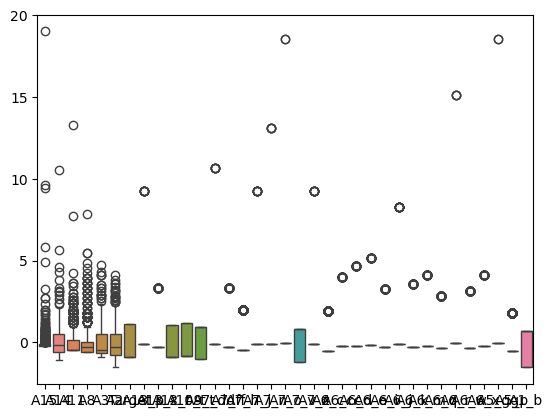

In [61]:
sns.boxplot(Data)


In [62]:
import numpy as np

Q1 = Data.quantile(0.25)
Q3 = Data.quantile(0.75)

IQR = Q3 - Q1

lower_bounD = Q1 - 1.5*IQR
upper_bounD = Q3 + 1.5*IQR

Data_Cleaned =  Data[~((Data< lower_bounD) | (Data > upper_bounD)).any(axis=1)]

<Axes: >

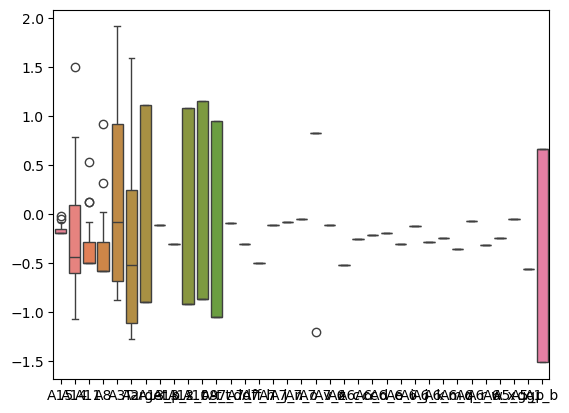

In [63]:
sns.boxplot(Data_Cleaned)

In [64]:
from scipy.stats import zscore

# Compute Z-scores
z_scores = Data.select_dtypes(include=['number']).apply(zscore)

# Keep only rows where all Z-scores are within the threshold
Data_cleaned = Data[(z_scores < 3).all(axis=1)]

<Axes: >

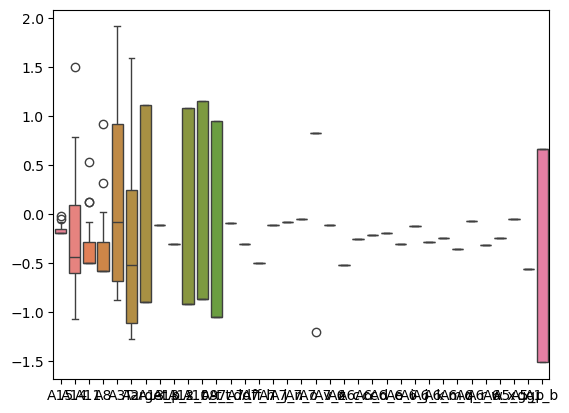

In [65]:
sns.boxplot(Data_Cleaned)